In [1]:
# useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
cd ../

/home/mbanga/Documents/Epfl/ml_revisions


# Logistic Regression
## Classification Using Linear Regression
Load data.

In [3]:
from logisticRegression.helpers import sample_data, load_data, standardize

# load data.
height, weight, gender = load_data()

# build sampled x and y.
seed = 1
data_size = len(height)
num_features = 2

x = np.empty((data_size, num_features))
y = gender
x[:, 0] = height
x[:, 1] = weight



y, x = sample_data(y, x, seed, size_samples=200)
x, mean_x, std_x = standardize(x)

In [4]:
from leastSquares.least_squares import least_squares
from logisticRegression.plots import visualization

def least_square_classification_demo(y, x):
    """classify the data by linear regression"""
    N, D = x.shape
    
    tx = np.empty((N, D+1))
    tx[:, 0]  = np.ones((N,))
    tx[:, 1:] = x
    mse_star, w = least_squares(y, tx)
    
    visualization(y, x, mean_x, std_x, w, "classification_by_least_square")

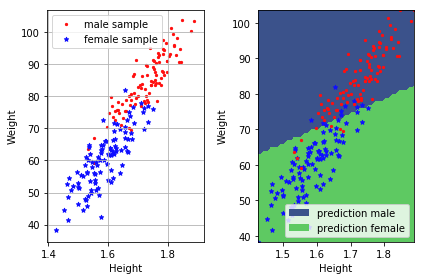

In [5]:
least_square_classification_demo(y, x)

In [6]:
def sigmoid(t):
    """apply sigmoid function on t."""
    return np.exp(t) / (1+np.exp(t))

In [7]:
def calculate_loss(y, tx, w):
    """compute the cost by negative log likelihood."""
    Xw = tx@w
    return np.sum( np.log(1 + np.exp(Xw)) - (Xw) * y)

In [8]:
def calculate_gradient(y, tx, w):
    """compute the gradient of loss."""
    return tx.T @ (sigmoid(tx@w) - y)

### Using Gradient Descent
Implement your function to calculate the gradient for logistic regression.

In [9]:
def learning_by_gradient_descent(y, tx, w, gamma):
    """
    Do one step of gradient descent using logistic regression.
    Return the loss and the updated w.
    """   
    gradient = calculate_gradient(y, tx, w)
    w = w - gamma*gradient
    loss = calculate_loss(y, tx, w)
    return loss, w

In [10]:
def gradient_descent(y, x, w_initial, max_iter=100, gamma=.05):
    """Returns loss and weight """
    N, D = x.shape
    
    tx = np.empty((N, D+1))
    tx[:, 0]  = np.ones((N,))
    tx[:, 1:] = x
    
    ls = [calculate_loss(y, tx, w_initial)]
    ws = [w_initial]
    for i in range(max_iter):
        l, w = learning_by_gradient_descent(y, tx, ws[-1], gamma)
        # update
        ls.append(l)
        ws.append(w)
    w_star = ws[-1]
    l_star = ls[-1]
    
    return l_star, w_star

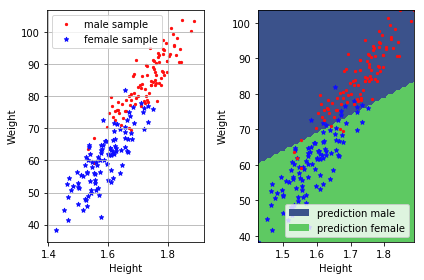

In [11]:
w_initial = np.array([0, 0, 0])
l_star, w_star = gradient_descent(y, x, w_initial)
visualization(y, x, mean_x, std_x, w_star, "classification_by_logistic_regression")

In [12]:
def calculate_hessian(y, tx, w):
    """return the hessian of the loss function."""
    s = sigmoid(tx@w)
    S = np.diag(s * (1 - s))
    return tx.T @ S @ tx

In [13]:
def logistic_regression(y, tx, w):
    """return the loss, gradient, and hessian."""
    
    l = calculate_loss(y, tx, w)
    g = calculate_gradient(y, tx, w)
    h = calculate_hessian(y, tx, w)
    return l, g, h

### Using Newton's method
Use Newton's method for logistic regression.

In [14]:
def learning_by_newton_method(y, tx, w, gamma=.05):
    """
    Do one step on Newton's method.
    return the loss and updated w.
    """
    loss, grad, hess = logistic_regression(y, tx, w)
    # update w
    w = w - gamma * (np.linalg.inv(hess) @ grad)
    
    return loss, w

In [15]:
def gradient_descent(y, x, w_initial, method, max_iter=100, gamma=.05):
    """Returns loss and weight """
    N, D = x.shape
    
    tx = np.empty((N, D+1))
    tx[:, 0]  = np.ones((N,))
    tx[:, 1:] = x
    
    ls = []
    ws = [w_initial]
    for i in range(max_iter):
        l, w = method(y, tx, ws[-1], gamma)
        # update
        ls.append(l)
        ws.append(w)
    w_star = ws[-1]
    l_star = ls[-1]
    
    return l_star, w_star

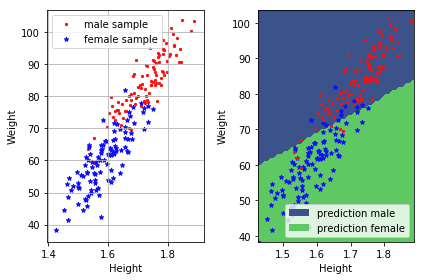

In [16]:
w_initial = np.array([0, 0, 0])
l_star, w_star = gradient_descent(y, x, w_initial, learning_by_newton_method)
visualization(y, x, mean_x, std_x, w_star, "classification_by_logistic_regression")

## Penalized logistic regression

In [17]:
def calculate_penalized_loss(y, tx, w, lambda_):
    """compute the cost by negative log likelihood."""
    return calculate_loss(y, tx, w) + lambda_ * np.linalg.norm(w) ** 2

In [18]:
def calculate_penalized_gradient(y, tx, w, lambda_):
    """compute the gradient of loss."""
    return calculate_gradient(y, tx, w) + lambda_*w

In [19]:
def calculate_penalized_hessian(y, tx, w, lambda_):
    """return the hessian of the loss function."""
    return calculate_hessian(y, tx, w) + lambda_*np.identity(tx.shape[1])

In [20]:
def penalized_logistic_regression(y, tx, w, lambda_):
    """return the loss, gradient, and hessian."""
    l = calculate_penalized_loss(y, tx, w, lambda_)
    g = calculate_penalized_gradient(y, tx, w, lambda_)
    h = calculate_penalized_hessian(y, tx, w, lambda_)
    return l, g, h

In [21]:
def learning_by_penalized_gradient(y, tx, w, gamma=.05, lambda_=1):
    """
    Do one step on Newton's method.
    return the loss and updated w.
    """
    loss, grad, hess = penalized_logistic_regression(y, tx, w, lambda_)
    # update w
    w = w - gamma * (np.linalg.inv(hess) @ grad)
    
    return loss, w

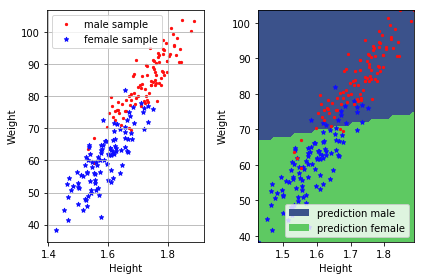

In [22]:
w_initial = np.array([0, 0, 0])
l_star, w_star = gradient_descent(y, x, w_initial, learning_by_penalized_gradient)
visualization(y, x, mean_x, std_x, w_star, "classification_by_logistic_regression")